In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from concurrent.futures import ThreadPoolExecutor

# from utils.methods_RLRW import (
#     runif_ball, 
#     euclid_distance, 
#     weighted_quantile, 
#     smoothed_weighted_quantile, 
#     opt_RLCP_h, 
#     opt_RLCP_h_passdwd
# 
# 
# 
# 
# ,
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


from scipy.stats import multivariate_normal, norm

In [2]:
path_baselin_school_csv = "../Data/data_indonesia/school_baseline.csv" 
path_students_baseline_csv = "../Data/data_indonesia/students_baseline.csv"
path_teachers_baseline_csv = "../Data/data_indonesia/teachers_baseline.csv"
path_students_extra = "../Data/data_indonesia/students_EXTRA.csv"
path_students = "../Data/data_indonesia/students.csv"
path_teachers = "../Data/data_indonesia/teachers.csv"



df_school = pd.read_csv(path_baselin_school_csv)
df_students_baseline = pd.read_csv(path_students_baseline_csv)
df_teachers_baseline = pd.read_csv(path_teachers_baseline_csv)
df_students_extra = pd.read_csv(path_students_extra)
df_students = pd.read_csv(path_students)
df_teachers = pd.read_csv(path_teachers, converters={"treatment": lambda x: int(x == "treatment")})

In [3]:
df_school.head(10)

,school_id,district_id,triplet_id,year,treatment,SD,nrrombel,nrstudents,classsize,nrteachers
0,178,10,60,0,control,primary school,6,166,27.666666,6
1,172,10,58,0,treatment,primary school,6,212,35.333332,6
2,179,10,60,0,control,primary school,6,132,22.000000,10
3,173,10,58,0,control,primary school,6,33,5.500000,5
4,175,10,59,0,control,primary school,6,105,17.500000,9
5,180,10,60,0,treatment,primary school,6,146,24.333334,6
6,169,10,57,0,treatment,primary school,6,101,16.833334,2
7,174,10,58,0,control,primary school,6,75,12.500000,3
8,170,10,57,0,control,primary school,6,109,18.166666,8
9,171,10,57,0,control,primary school,6,136,22.666666,6


In [4]:
df_students_baseline.head(10)

,student_id,school_id,district_id,triplet_id,year,treatment,SD,MAT_score,IPA_score,BIN_score,BIG_score,assets
0,62267,166,10,56,0,control,junior secondary school,0.772727,0.863636,0.818182,0.75,0.142857
1,62254,166,10,56,0,control,junior secondary school,0.727273,0.818182,0.863636,0.85,0.285714
2,62284,166,10,56,0,control,junior secondary school,0.681818,0.818182,0.863636,0.80,0.285714
3,62256,166,10,56,0,control,junior secondary school,0.727273,0.818182,0.818182,0.85,0.142857
4,62288,166,10,56,0,control,junior secondary school,0.772727,0.818182,0.818182,0.80,0.142857
5,62249,166,10,56,0,control,junior secondary school,0.636364,0.772727,0.909091,0.70,0.142857
6,62274,166,10,56,0,control,junior secondary school,0.681818,0.818182,0.863636,0.85,0.571429
7,62248,166,10,56,0,control,junior secondary school,0.772727,0.818182,0.863636,0.80,0.142857
8,62282,166,10,56,0,control,junior secondary school,0.681818,0.727273,0.909091,0.80,0.142857
9,62273,166,10,56,0,control,junior secondary school,NaN,0.681818,NaN,0.35,0.142857


<Axes: >

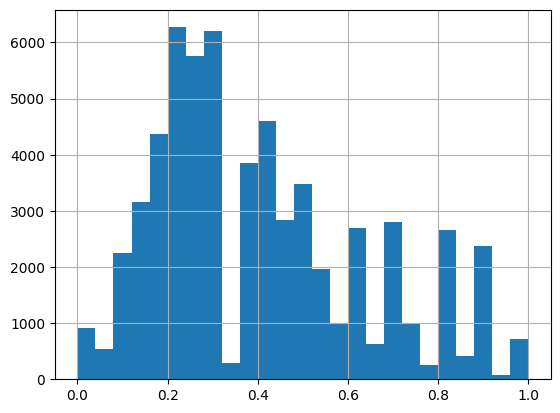

In [5]:
df_students_baseline["MAT_score"].hist(bins = 25)

In [6]:
df_students.head(10)

,student_id,school_id,district_id,triplet_id,subject,year,treatment,SD,ITT_score,testbook,ITT_score0,missing_ITT_score0,schoolscore0,missing_schoolscore0,assets,weight,int_mTARGET,int_sTARGET,int_assets,int_N,int_relativesize,int_logN,int_logrelativesize,int_schoolscore0,teacherage,TARGET,T2,NT2,M2,T3,NT3,M3,P2,P3
0,63708,178,10,60,IPA,2,control,primary school,-1.939628,1,0.0,1,0.0,1,0.428571,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
1,63708,178,10,60,MAT,2,control,primary school,-2.314207,1,0.0,1,0.0,1,0.428571,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
2,63708,178,10,60,BIN,2,control,primary school,-2.362830,1,0.0,1,0.0,1,0.428571,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
3,63711,178,10,60,BIN,2,control,primary school,-0.977294,1,0.0,1,0.0,1,0.000000,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
4,63711,178,10,60,MAT,2,control,primary school,-1.056875,1,0.0,1,0.0,1,0.000000,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
5,63711,178,10,60,IPA,2,control,primary school,-1.750918,1,0.0,1,0.0,1,0.000000,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
6,63710,178,10,60,MAT,2,control,primary school,-1.475986,1,0.0,1,0.0,1,0.428571,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
7,63710,178,10,60,IPA,2,control,primary school,-1.939628,1,0.0,1,0.0,1,0.428571,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
8,63710,178,10,60,BIN,2,control,primary school,-1.808615,1,0.0,1,0.0,1,0.428571,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN
9,63722,178,10,60,MAT,2,control,primary school,-0.847319,1,0.0,1,0.0,1,0.571429,0.333333,0.285714,2,0.661017,59,0.091615,4.077538,-2.390161,NaN,53.0,1.0,1.0,0.0,0,0.0,0.0,1,0.0,NaN


In [7]:
df_school.describe()

,school_id,district_id,triplet_id,year,nrrombel,nrstudents,classsize,nrteachers
count,360.000000,360.000000,360.000000,360.0,360.000000,360.000000,360.000000,360.000000
mean,180.500000,10.500000,60.500000,0.0,8.511111,186.611111,20.860223,9.166667
std,104.067286,5.774307,34.688025,0.0,4.622808,134.662164,7.020421,4.796122
min,1.000000,1.000000,1.000000,0.0,3.000000,17.000000,2.833333,2.000000
25%,90.750000,5.750000,30.750000,0.0,6.000000,96.000000,15.964285,6.000000
50%,180.500000,10.500000,60.500000,0.0,6.000000,148.500000,21.416667,7.000000
75%,270.250000,15.250000,90.250000,0.0,9.250000,218.000000,25.407143,11.000000
max,360.000000,20.000000,120.000000,0.0,30.000000,820.000000,40.833332,37.000000


In [8]:
df_students.describe()

,student_id,school_id,district_id,triplet_id,year,ITT_score,testbook,ITT_score0,missing_ITT_score0,schoolscore0,missing_schoolscore0,assets,weight,int_mTARGET,int_sTARGET,int_assets,int_N,int_relativesize,int_logN,int_logrelativesize,int_schoolscore0,teacherage,TARGET,T2,NT2,M2,T3,NT3,M3,P2,P3
count,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,5.540590e+05,554059.000000,554059.000000,554059.000000,515849.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,545761.000000,519463.000000,520103.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,554059.000000,528585.000000,434622.000000
mean,67797.279187,180.114459,10.594556,60.382642,2.496324,0.010357,6.125091,-3.163093e-09,0.711863,0.196715,0.014977,0.584736,0.284422,0.514926,7.843876,3.706333,288.057321,0.394534,5.445894,-1.124395,0.199706,43.319784,0.541198,0.441488,0.498230,0.060282,0.417210,0.376158,0.206631,0.334733,0.506302
std,39412.135892,103.162420,5.727714,34.389017,0.499987,1.008643,2.524397,5.367426e-01,0.452896,1.038222,0.121460,0.223157,0.041032,0.199394,5.359916,1.005783,177.740128,0.228941,0.702838,0.668543,1.045799,8.759010,0.482147,0.486883,0.490383,0.238010,0.477627,0.468663,0.404889,0.463185,0.488375
min,1.000000,1.000000,1.000000,1.000000,2.000000,-4.471739,1.000000,-3.651184e+00,0.000000,-2.347267,0.000000,0.000000,0.250000,0.000000,0.000000,0.375000,10.000000,0.013038,2.302585,-4.339901,-2.347267,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32815.000000,93.000000,6.000000,31.000000,2.000000,-0.716269,4.000000,0.000000e+00,0.000000,-0.557704,0.000000,0.428571,0.250000,0.384615,4.000000,3.042857,144.000000,0.218944,4.969813,-1.518939,-0.568128,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68853.000000,189.000000,11.000000,63.000000,2.000000,-0.038949,7.000000,0.000000e+00,1.000000,0.022628,0.000000,0.571429,0.250000,0.500000,6.000000,3.802198,240.000000,0.343168,5.480639,-1.069536,0.041917,45.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,102087.000000,272.000000,16.000000,91.000000,3.000000,0.721456,8.000000,0.000000e+00,1.000000,0.821458,0.000000,0.714286,0.333333,0.652174,11.000000,4.268344,409.000000,0.555901,6.013715,-0.587166,0.832197,50.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,135558.000000,360.000000,20.000000,120.000000,3.000000,5.325746,9.000000,4.861450e+00,1.000000,5.226312,1.000000,1.000000,0.333333,1.000000,27.000000,6.283019,767.000000,1.000000,6.642487,0.000000,5.226312,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_teachers.describe()

,teacher_id,school_id,district_id,triplet_id,year,treatment,PAID,TARGET,NOTELIGIBLE,ngscore,pursue,secondjobhours,base_pay,additional_pay,certification_pay,totalpay,absent,quota_year
count,10725.000000,10725.000000,10725.000000,10725.000000,10725.000000,10725.000000,9482.000000,9951.000000,9990.000000,8930.000000,6069.000000,9102.000000,8781.000000,9236.000000,9180.000000,8728.000000,9170.000000,4895.000000
mean,2213.851375,178.968112,10.456783,59.994312,1.688392,0.340886,0.315123,0.522963,0.242442,0.004346,0.168232,2.884311,2.157033,0.638291,0.662232,3.503709,0.167503,2008.987947
std,1276.744611,103.662594,5.757819,34.554732,1.206434,0.474029,0.464589,0.499498,0.428582,1.007677,0.374103,7.185972,0.890092,0.603690,1.048851,1.959299,0.373444,1.400587
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.778343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000
25%,1098.000000,91.000000,6.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.710631,0.000000,0.000000,1.811700,0.339560,0.000000,2.381948,0.000000,2008.000000
50%,2255.000000,184.000000,11.000000,62.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.022399,0.000000,0.000000,2.431000,0.602300,0.000000,3.257046,0.000000,2009.000000
75%,3324.000000,269.000000,15.000000,90.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.752209,0.000000,2.000000,2.744400,0.889784,1.786530,5.086958,0.000000,2010.000000
max,4393.000000,360.000000,20.000000,120.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.408105,1.000000,90.000000,4.147870,9.584104,8.729150,15.173103,1.000000,2012.000000


In [10]:
student_df = df_students_baseline.copy()

In [11]:
df_teachers.head(5)

,teacher_id,school_id,district_id,triplet_id,year,tested,interviewed,treatment,SD,quota,certified,PAID,TARGET,NOTELIGIBLE,ngscore,S1,pursue,secondjob,secondjobhours,base_pay,additional_pay,certification_pay,totalpay,problems,happy,absent,quota_year
0,2170,178,10,60,2,tested,interviewed,0,primary school,not in quota,not certified,0.0,1.0,0.0,-0.875381,no bachelor's degree,0.0,no second job,0.0,2.7528,1.563500,0.0,4.316300,yes,yes,0.0,NaN
1,2167,178,10,60,2,tested,interviewed,0,primary school,not in quota,not certified,0.0,1.0,0.0,-1.699128,no bachelor's degree,0.0,no second job,0.0,2.4732,1.926659,0.0,4.399859,yes,yes,0.0,NaN
2,2168,178,10,60,2,tested,interviewed,0,primary school,not in quota,not certified,0.0,0.0,1.0,-0.710631,NaN,1.0,second job,6.0,1.5774,1.788169,0.0,3.365569,no,yes,0.0,NaN
3,2169,178,10,60,2,not tested,not interviewed,0,primary school,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2173,178,10,60,2,tested,interviewed,0,primary school,not in quota,not certified,0.0,0.0,1.0,-1.204880,no bachelor's degree,0.0,no second job,0.0,2.2445,1.922563,0.0,4.167063,yes,yes,0.0,NaN


In [12]:
df_teachers["treatment"].value_counts()

treatment
0    7069
1    3656
Name: count, dtype: int64

In [13]:
student_df["teacher_average_base_pay"] = student_df["school_id"].map(df_teachers.groupby("school_id")["base_pay"].mean())
student_df["classize"] = student_df["school_id"].map(df_school.groupby("school_id")["classsize"].mean())
student_df["num_teachers"] = student_df["school_id"].map(df_teachers.groupby("school_id")["teacher_id"].count())
student_df["num_students"] = student_df["school_id"].map(df_students_baseline.groupby("school_id")["student_id"].count())
student_df["school_score"]  = student_df["school_id"].map(df_students.groupby("school_id")["schoolscore0"].mean())
student_df["SD"] = np.where(student_df["SD"] == "primary_school", 0, 1)
# student_df["num_treatment"] = student_df["school_id"].map(df_teachers.groupby("school_id")["treatment"].sum())

student_df = student_df.drop(columns = "BIG_score")
student_df = student_df.dropna()
student_df = student_df.reset_index(drop = True)

In [14]:
student_df

,student_id,school_id,district_id,triplet_id,year,treatment,SD,MAT_score,IPA_score,BIN_score,assets,teacher_average_base_pay,classize,num_teachers,num_students,school_score
0,62267,166,10,56,0,control,1,0.772727,0.863636,0.818182,0.142857,1.913971,15.833333,27,89,3.788049
1,62254,166,10,56,0,control,1,0.727273,0.818182,0.863636,0.285714,1.913971,15.833333,27,89,3.788049
2,62284,166,10,56,0,control,1,0.681818,0.818182,0.863636,0.285714,1.913971,15.833333,27,89,3.788049
3,62256,166,10,56,0,control,1,0.727273,0.818182,0.818182,0.142857,1.913971,15.833333,27,89,3.788049
4,62288,166,10,56,0,control,1,0.772727,0.818182,0.818182,0.142857,1.913971,15.833333,27,89,3.788049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59457,98056,258,15,86,0,control,1,0.090909,0.136364,0.454545,0.000000,1.424458,16.666666,20,50,-0.808286
59458,98059,258,15,86,0,control,1,0.136364,0.272727,0.454545,0.142857,1.424458,16.666666,20,50,-0.808286
59459,98054,258,15,86,0,control,1,0.227273,0.409091,0.318182,0.285714,1.424458,16.666666,20,50,-0.808286
59460,98045,258,15,86,0,control,1,0.136364,0.363636,0.545455,0.428571,1.424458,16.666666,20,50,-0.808286


In [48]:
X = student_df[
    [
    "school_id", "teacher_average_base_pay",
    "classize", "num_teachers", "num_students",
    "school_score", "SD", "BIN_score",
    "assets", "IPA_score"
    ]
]
Y = student_df["MAT_score"]
X = X.astype("float64")
Y = Y.astype("float64")

X = X.to_numpy()
Y = Y.to_numpy()

N, p = X.shape; alpha = 0.1; train_lag = 500

#adjust later
# N = 20000

perm = np.random.choice(N,N,replace=False)

X = X[perm]
Y = Y[perm]

methods = ['CP+LS', 'gaussian']
PI_split_CP = np.zeros((len(methods),N,2))
PI_split_CP[:, :train_lag, 0] = -np.inf
PI_split_CP[:, :train_lag, 1] = np.inf

In [16]:
def run(
    X, Y, pred_interval,
    train_lag, N, methods, alpha = 0.1
    ):
    for pred_idx in tqdm(np.arange(train_lag, N)):
        X_train = X[:pred_idx + 1]
        Y_train = Y[:pred_idx + 1]
        
        for method_idx, method in enumerate(methods):
            if method == "CP+LS":
                tags = np.ones(pred_idx)
                weights = np.ones(pred_idx)
            else:
                h = 1.5
                weights = kernel(X_train, h, pred_idx)
                tags = np.ones(pred_idx)
        
            
            
            inds_odd = np.arange(1,int(np.ceil(pred_idx/2)*2-1),2) # excludes pred_idx
            inds_even = np.arange(2,int(np.floor(pred_idx/2)*2),2) # excludes pred_idx
            
            model = LinearRegression()
            model.fit(X_train[inds_odd], Y_train[inds_odd], tags[inds_odd])
            
            
                           
            try:
                __, prediction_bands, _ = weighted_conformal_prediction(
                    model,
                    X[inds_even],
                    Y[inds_even],
                    X[pred_idx][np.newaxis, :],
                    weights[inds_odd],
                    alpha
                )
                pred_interval[method_idx, pred_idx, :] = prediction_bands
            except ValueError as e:
                print(f"Error for method {method} at pred_idx {pred_idx}: {e}")
                continue
            
    return pred_interval


#:D

def kernel(X, h, pred_idx):
    pred_idx_school = X[pred_idx, 0]
    weights = np.zeros(pred_idx)
    
    for i in range(pred_idx):
        if X[i, 0] == pred_idx_school:
            weights[i] = 0.9
        else: 
            n = X[pred_idx, 1:].shape[0]
            X_tilde = multivariate_normal.rvs(mean=X[pred_idx, 1:], cov=np.diag(np.ones(n)) * h**2)
            ker = np.exp(-np.sum((X[i, 1:] - X_tilde)**2) / h)
            weights[i] = ker
            
    return weights
        

In [17]:
pred_interval = run(X, Y, PI_split_CP, train_lag, N, methods, alpha)

  0%|          | 0/19500 [00:00<?, ?it/s]

  1%|          | 104/19500 [00:03<12:03, 26.80it/s]

Error for method gaussian at pred_idx 599: No valid threshold found; check alpha and weights with cumsum: 0.8602941176470588 and sum weights: 0.9264705882352942


  6%|▌         | 1078/19500 [01:07<26:32, 11.57it/s]

Error for method gaussian at pred_idx 1575: No valid threshold found; check alpha and weights with cumsum: 0.8389830508474577 and sum weights: 0.9152542372881355


 13%|█▎        | 2630/19500 [08:48<1:48:01,  2.60it/s]

Error for method gaussian at pred_idx 3129: No valid threshold found; check alpha and weights with cumsum: 0.8689655172413794 and sum weights: 0.9310344827586206


 14%|█▍        | 2770/19500 [09:47<2:12:53,  2.10it/s]

Error for method gaussian at pred_idx 3269: No valid threshold found; check alpha and weights with cumsum: 0.8392589728606663 and sum weights: 0.9153994594003505


 15%|█▍        | 2840/19500 [10:17<1:55:10,  2.41it/s]

Error for method gaussian at pred_idx 3339: No valid threshold found; check alpha and weights with cumsum: 0.8766233766237097 and sum weights: 0.9350649350651106


 15%|█▌        | 2928/19500 [10:54<1:58:41,  2.33it/s]

Error for method gaussian at pred_idx 3427: No valid threshold found; check alpha and weights with cumsum: 0.8766233766233782 and sum weights: 0.9350649350649358


 32%|███▏      | 6200/19500 [1:05:11<2:17:39,  1.61it/s]  

Error for method gaussian at pred_idx 6699: No valid threshold found; check alpha and weights with cumsum: 0.8689655172417058 and sum weights: 0.9310344827587925


100%|██████████| 19500/19500 [17:34:52<00:00,  3.25s/it]     


In [45]:
path_df_width = "../Data/keep_coverage_width.csv"

coverage_width_df = pd.read_csv(path_df_width)  


In [56]:
coverage_width_df

,coverage CP+LS,width CP+LS,coverage gaussian,width gaussian
0,1.0,1.000000,1.0,1.000000
1,1.0,1.000000,1.0,1.000000
2,1.0,1.000000,1.0,1.000000
3,1.0,1.000000,1.0,1.000000
4,1.0,1.000000,1.0,1.000000
...,...,...,...,...
58957,1.0,0.549301,1.0,0.549301
58958,1.0,0.294966,1.0,0.294966
58959,1.0,0.403022,1.0,0.403022
58960,1.0,0.452175,1.0,0.452175


In [57]:
methods

['CP+LS', 'gaussian']

In [49]:
coverage = np.zeros((len(methods), N - train_lag))
pi_width = np.zeros((len(methods), N - train_lag))

for method_idx, method in enumerate(methods):
    lower_bound = np.clip(PI_split_CP[method_idx, train_lag:, 0], 0, 1)
    upper_bound = np.clip(PI_split_CP[method_idx, train_lag:, 1], 0, 1)
    
    coverage[method_idx] = (lower_bound <= Y[train_lag:N]) & (upper_bound >= Y[train_lag:N])
    pi_width[method_idx] = upper_bound - lower_bound

In [50]:
coverage = np.zeros((len(methods), N - train_lag))
pi_width = np.zeros((len(methods), N - train_lag))

In [51]:
for method_idx, method in enumerate(methods):
    coverage[method_idx] = coverage_width_df[f"coverage {method}"]
    pi_width[method_idx] = coverage_width_df[f"width {method}"]

In [38]:
coverage = coverage[:, 1000:]
pi_width = pi_width[:, 1000:]

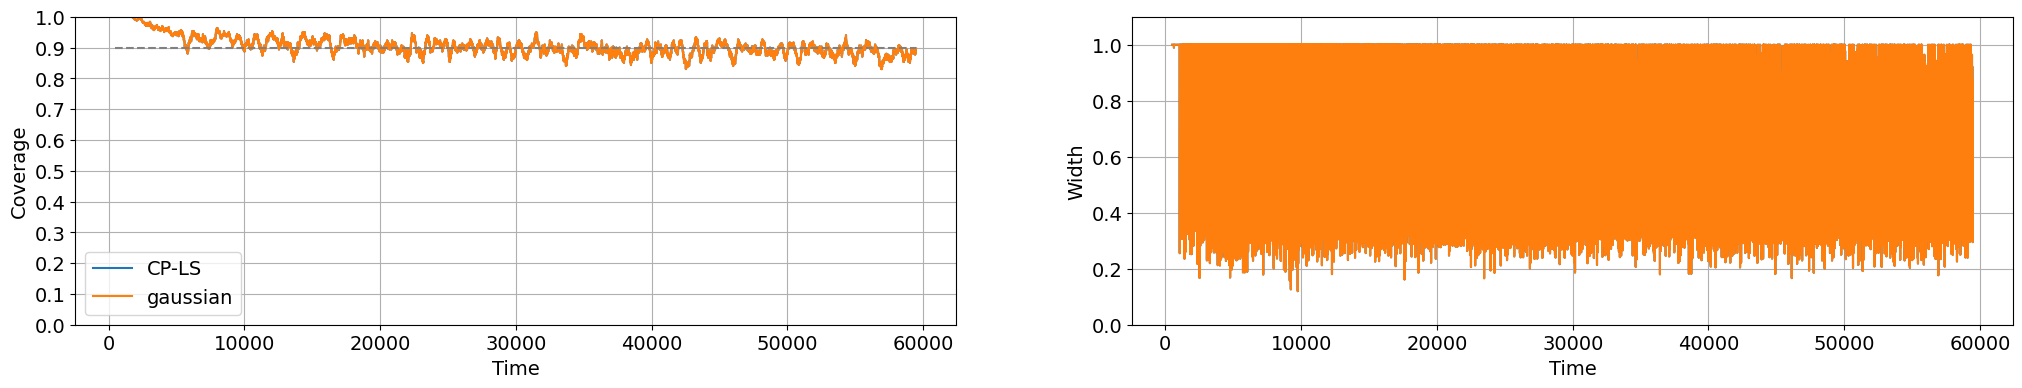

In [53]:
plt.rcParams.update({'font.size': 14})

window = 300 # will display a rolling average

def rolling_avg(x,window):
    return np.convolve(x, np.ones(window)/window)[(window-1):-window]
    
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,4))

for method_idx, method in enumerate(methods):
    ax[0].plot(np.arange(train_lag+window,N), rolling_avg(coverage[method_idx], window))
    ax[1].plot(np.arange(train_lag, N), pi_width[method_idx])

ax[0].hlines(1-alpha, xmin=train_lag, xmax=N, linestyles='--', colors='gray')
ax[0].legend(['CP-LS','gaussian'])

ax[0].set_ylabel('Coverage')
ax[0].set_ylim([0, 1])
ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax[0].set_xlabel('Time')
ax[0].grid(True)

ax[1].set_ylabel('Width')
ymax = np.max([
    pi_width[method_idx].max() for method_idx in range(len(methods))
]) * 1.1
ax[1].set_ylim([0, ymax])
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
ax[1].set_xlabel('Time')
ax[1].grid(True)

plt.show()

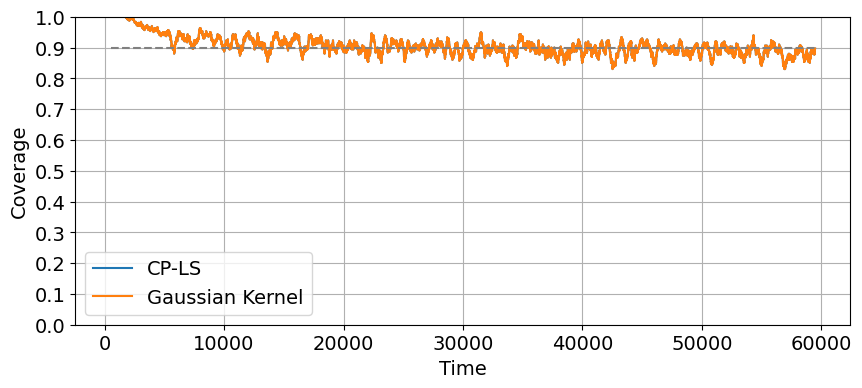

In [55]:
plt.rcParams.update({'font.size': 14})

window = 300 # will display a rolling average

def rolling_avg(x,window):
    return np.convolve(x, np.ones(window)/window)[(window-1):-window]
    
fig, ax = plt.subplots(figsize=(10,4))

for method_idx, method in enumerate(methods):
    ax.plot(np.arange(train_lag+window,N), rolling_avg(coverage[method_idx], window))

ax.hlines(1-alpha, xmin=train_lag, xmax=N, linestyles='--', colors='gray')
ax.legend(['CP-LS','Gaussian Kernel'])

ax.set_ylabel('Coverage')
ax.set_ylim([0, 1])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_xlabel('Time')
ax.grid(True)

plt.show()

# path = "../images/coverage_pot_into.png"
# fig.savefig(path)

In [58]:
for method_idx, method in enumerate(methods):
    print(f'{method} coverage: {np.mean(coverage[method_idx])}')
    print(f'{method} average prediction interval width: {np.mean(pi_width[method_idx])}')
    print("-"*90)

CP+LS coverage: 0.9052270954173874
CP+LS average prediction interval width: 0.6072114729099927
------------------------------------------------------------------------------------------
gaussian coverage: 0.9052270954173874
gaussian average prediction interval width: 0.6072114729099927
------------------------------------------------------------------------------------------


In [ ]:
for method_idx, method in enumerate(methods):
    print(f'{method} coverage: {np.mean(coverage[method_idx])}')
    print(f'{method} average prediction interval width: {np.mean(pi_width[method_idx])}')
    print("-"*90)